In [31]:
pd.read_sql("PRAGMA table_info(students);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,gender,TEXT,0,None,0
1,1,race/ethnicity,TEXT,0,None,0
2,2,parental level of education,TEXT,0,None,0
3,3,lunch,TEXT,0,None,0
4,4,test preparation course,TEXT,0,None,0
5,5,math score,INTEGER,0,None,0
6,6,reading score,INTEGER,0,None,0
7,7,writing score,INTEGER,0,None,0
8,8,Attendance,INTEGER,0,None,0
9,9,Hours_Studied,REAL,0,None,0


In [34]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# reopen the connection
conn = sqlite3.connect("students.db")



In [26]:
# -----------------------------
# Step 1: Load CSV into SQLite
# -----------------------------
csv_path = r"C:\Users\shrey\Students_Score_Prediction\data\Students Performance.csv"

# Read CSV
df = pd.read_csv(csv_path)

# Create DB connection
conn = sqlite3.connect("students.db")

# Load data into table
df.to_sql("students", conn, if_exists="replace", index=False)
print("✅ Data loaded into SQLite successfully!\n")

✅ Data loaded into SQLite successfully!



In [27]:
# -----------------------------
# Step 2: Run SQL Queries
# -----------------------------

# 4.1 Row count
print("📌 4.1 Row Count")
print(pd.read_sql("SELECT COUNT(*) AS total FROM students", conn), "\n")

# 4.2 Distinct counts (gender)
print("📌 4.2 Gender Counts")
print(pd.read_sql("SELECT gender, COUNT(*) AS cnt FROM students GROUP BY gender", conn), "\n")

# 4.3 Average final score by gender
print("📌 4.3 Average Final Score by Gender")
print(pd.read_sql("""
SELECT gender, ROUND(AVG(final_score),2) AS avg_final
FROM students
GROUP BY gender
ORDER BY avg_final DESC
""", conn), "\n")

# 4.4 Average final score by parental education
print("📌 4.4 Average Final Score by Parental Education")
print(pd.read_sql("""
SELECT "parental level of education" AS parental_education,
       ROUND(AVG(final_score),2) AS avg_final,
       COUNT(*) AS cnt
FROM students
GROUP BY "parental level of education"
ORDER BY avg_final DESC
""", conn), "\n")

# 4.5 Top 10 students by Final Score
print("📌 4.5 Top 10 Students by Final Score")
print(pd.read_sql("SELECT * FROM students ORDER BY final_score DESC LIMIT 10", conn), "\n")

# 4.6 Distribution buckets
print("📌 4.6 Score Distribution Buckets")
bucket_df = pd.read_sql("""
SELECT
  CASE
    WHEN final_score >= 90 THEN '90-100'
    WHEN final_score >= 80 THEN '80-89'
    WHEN final_score >= 70 THEN '70-79'
    WHEN final_score >= 60 THEN '60-69'
    ELSE '<60'
  END AS score_bucket,
  COUNT(*) AS cnt
FROM students
GROUP BY score_bucket
ORDER BY score_bucket DESC
""", conn)
print(bucket_df, "\n")

📌 4.1 Row Count
   total
0   1000 

📌 4.2 Gender Counts
   gender  cnt
0  female  518
1    male  482 

📌 4.3 Average Final Score by Gender
   gender  avg_final
0  female      69.57
1    male      65.84 

📌 4.4 Average Final Score by Parental Education
   parental_education  avg_final  cnt
0     master's degree      73.60   59
1   bachelor's degree      71.93  118
2  associate's degree      69.57  222
3        some college      68.47  226
4    some high school      65.10  179
5         high school      63.10  196 

📌 4.5 Top 10 Students by Final Score
   gender race/ethnicity parental level of education         lunch  \
0  female        group E           bachelor's degree      standard   
1    male        group E           bachelor's degree      standard   
2  female        group E          associate's degree      standard   
3  female        group E           bachelor's degree      standard   
4  female        group D            some high school      standard   
5  female        group 

In [28]:
query = """
SELECT gender, ROUND(AVG(final_score),2) AS avg_final
FROM students
GROUP BY gender
ORDER BY avg_final DESC;
"""

gender_avg_df = pd.read_sql(query, conn)
print(gender_avg_df)


   gender  avg_final
0  female      69.57
1    male      65.84


In [35]:
query = """
SELECT "parental level of education" AS parental_education,
       ROUND(AVG("Final_Score"), 2) AS avg_final
FROM students
GROUP BY "parental level of education"
ORDER BY avg_final DESC;
"""

parental_df = pd.read_sql(query, conn)
print(parental_df)



   parental_education  avg_final
0     master's degree      73.60
1   bachelor's degree      71.93
2  associate's degree      69.57
3        some college      68.47
4    some high school      65.10
5         high school      63.10


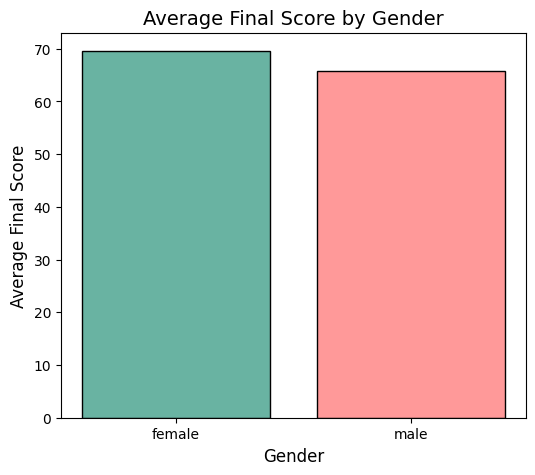

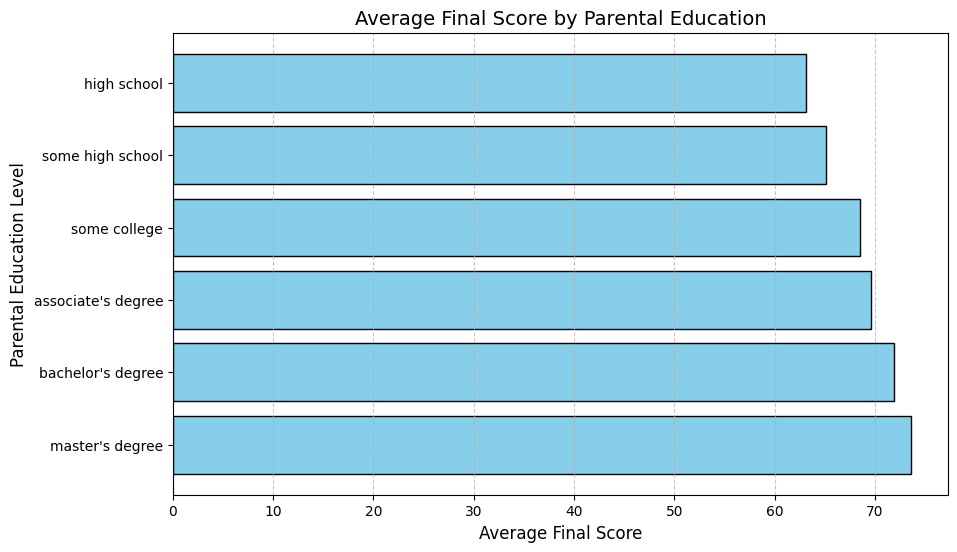

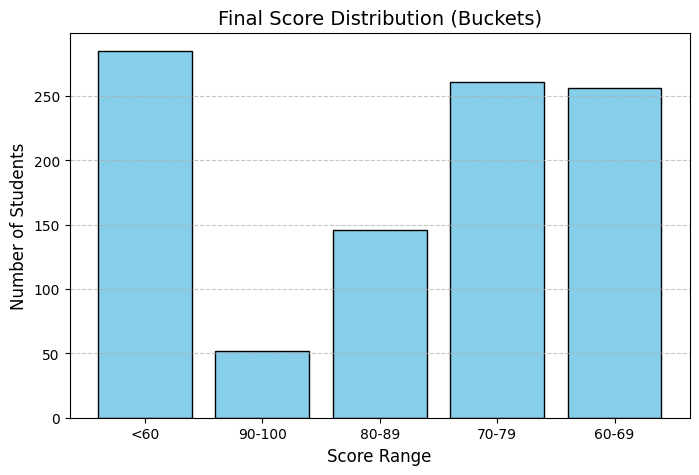

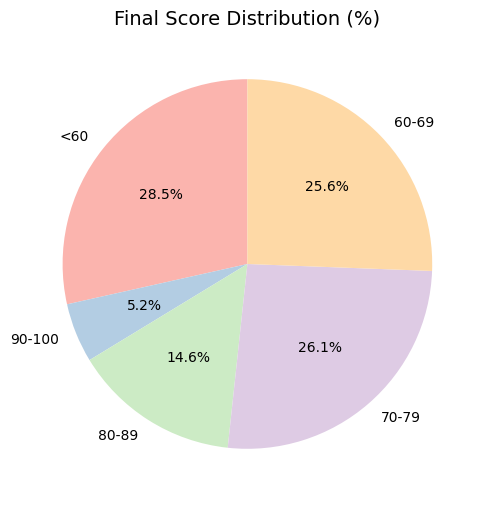

In [36]:
# -----------------------------
# Step 3: Visualizations
# -----------------------------

# 4.3 Gender-wise average scores
plt.figure(figsize=(6,5))
plt.bar(gender_avg_df['gender'], gender_avg_df['avg_final'],
        color=['#69b3a2','#ff9999'], edgecolor='black')
plt.title("Average Final Score by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Final Score", fontsize=12)
plt.show()

# 4.4 Parental education averages
plt.figure(figsize=(10,6))
plt.barh(parental_df['parental_education'], parental_df['avg_final'], color='skyblue', edgecolor='black')
plt.title("Average Final Score by Parental Education", fontsize=14)
plt.xlabel("Average Final Score", fontsize=12)
plt.ylabel("Parental Education Level", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4.6 Distribution (Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(bucket_df['score_bucket'], bucket_df['cnt'], color='skyblue', edgecolor='black')
plt.title("Final Score Distribution (Buckets)", fontsize=14)
plt.xlabel("Score Range", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4.6 Distribution (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(bucket_df['cnt'], labels=bucket_df['score_bucket'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Final Score Distribution (%)", fontsize=14)
plt.show()

In [37]:
# -----------------------------
# Step 4: Close connection
# -----------------------------
conn.close()
print("✅ Queries executed, charts created, and DB connection closed!")

✅ Queries executed, charts created, and DB connection closed!
